In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Read in csv data file

data = pd.read_csv("data_archive/train.csv")

In [3]:
sales_df=pd.DataFrame(data)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
sales_df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [5]:
sales_df.dropna(axis=0, inplace=True)
sales_df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
Product ID       9789
Category         9789
Sub-Category     9789
Product Name     9789
Sales            9789
dtype: int64

In [6]:
# Questions we want to answer about this data:
# Where are the most orders being placed?
#  -1 bar graph of sales data (count orders) grouped by state
#  -1 geo data graph of sales data (count orders) by state with size of the circle=amount of orders

# Where are different categories most popular?
#  -group by category, count unique zip codes per category, bar graph of this information
#  -create pie chart of regions where orders in different categories are placed

# What products/sales are the most popular during specific times of the year?
#  -line chart that tracks different categories over time
#  -line chart tracking products within most popular category over time

# Difference between Orders vs. Sales over time?
#  -look at average number of items per order 
#  -(scatter plot) x-axis=total sales cost in order, y-axis=number of items in order
#  -sales vs. time line graph 


# For each question, 2 graphs and a set of statistical data
# linear regression/correlation, averages where applicable

In [7]:
# What products/sales are the most popular during specific times of the year?
#  -line chart that tracks different categories over time
#  -line chart tracking products within most popular category over time
import matplotlib.pyplot as plt
import numpy as np

sales_df["Order Date"]
sales_df =  sales_df.sort_values(by='Order Date',ascending=False)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1153,1154,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768
4613,4614,US-2017-165953,31/12/2017,06/01/2018,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480
5738,5739,CA-2017-156139,31/12/2017,06/01/2018,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376
4612,4613,US-2017-165953,31/12/2017,06/01/2018,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616
1152,1153,CA-2017-160395,31/12/2017,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640


In [8]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"], dayfirst =True)

In [9]:
sales_df["Month"] = sales_df["Order Date"].dt.month
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
1153,1154,CA-2017-160395,2017-12-31,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-BI-10003984,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,12
4613,4614,US-2017-165953,2017-12-31,06/01/2018,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,12
5738,5739,CA-2017-156139,2017-12-31,06/01/2018,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,94109.0,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,12
4612,4613,US-2017-165953,2017-12-31,06/01/2018,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,32216.0,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,12
1152,1153,CA-2017-160395,2017-12-31,06/01/2018,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,Nevada,89502.0,West,OFF-AR-10003759,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,8074,CA-2018-151750,2018-01-01,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,1
848,849,CA-2018-107503,2018-01-01,06/01/2018,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,Ohio,44052.0,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,1
8072,8073,CA-2018-151750,2018-01-01,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,1
8071,8072,CA-2018-151750,2018-01-01,05/01/2018,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,Texas,77340.0,Central,FUR-CH-10003199,Furniture,Chairs,Office Star - Contemporary Task Swivel Chair,310.744,1


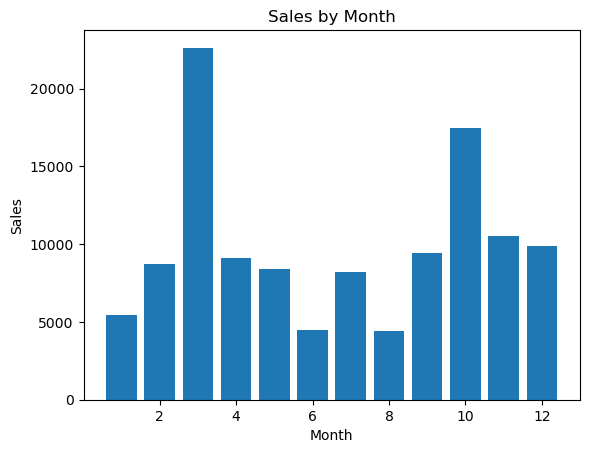

In [72]:
x = sales_df["Month"]
y = sales_df["Sales"]

plt.bar(x, y)
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [11]:
sales_by_category = sales_df.groupby("Category").size().reset_index(name="count")
sales_by_category
sales_by_category_pivot = pd.pivot_table(sales_df, index = "Category", values="Sales", aggfunc="count")
sales_by_category_pivot

,Sales
Category,
Furniture,2076
Office Supplies,5903
Technology,1810


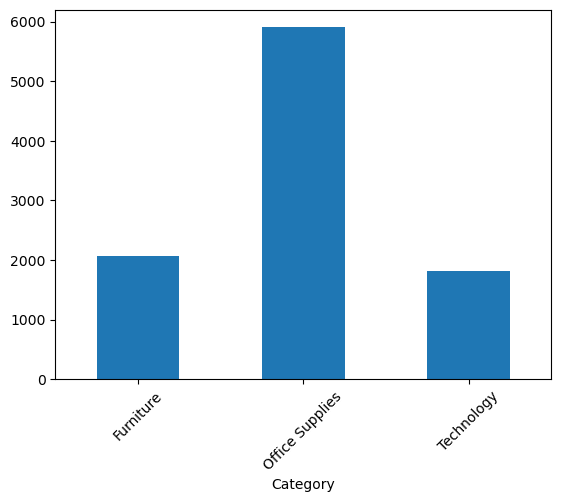

In [12]:
sales_by_category_pivot.plot(kind="bar", legend=None)
plt.xticks(rotation=45)
plt.show()


In [73]:
sub_category_sales = sales_df.groupby("Sub-Category")["Sales"].sum()
#top_sub_category = sub_category_sales.sort_values(ascending=False)
top_sub_category = sub_category_sales.nlargest(7)
top_sub_category

Sub-Category
Phones         326487.698
Chairs         322107.531
Storage        217779.102
Tables         202810.628
Binders        200028.785
Machines       189238.631
Accessories    163881.690
Name: Sales, dtype: float64

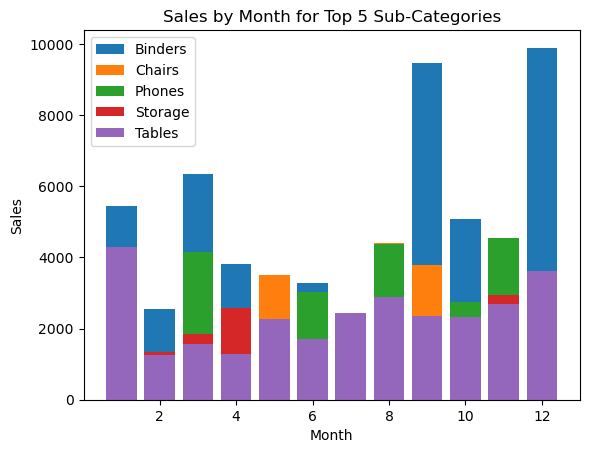

In [71]:
# Look into Other categories 
sub_categories = ["Phones", "Chairs", "Storage", "Tables", "Binders"]
filtered_sales = sales_df[sales_df["Sub-Category"].isin(sub_categories)]
grouped_data = filtered_sales.groupby("Sub-Category")
                                      
for name, group in grouped_data:
    plt.bar(group["Month"], group["Sales"], label=name)
    
plt.title("Sales by Month for Top 5 Sub-Categories")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

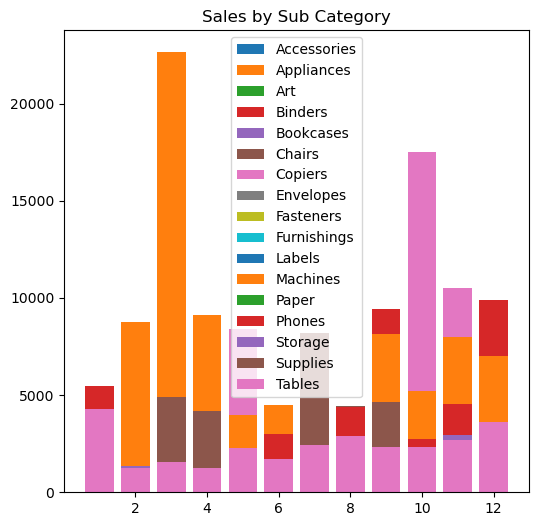

In [63]:
grouped_data = sales_df.groupby("Sub-Category")
plt.figure(figsize=(6,6))

for name, group in grouped_data:
    plt.bar(group["Month"], group["Sales"], label=name)
    
plt.title("Sales by Sub Category")
plt.legend()
plt.show()


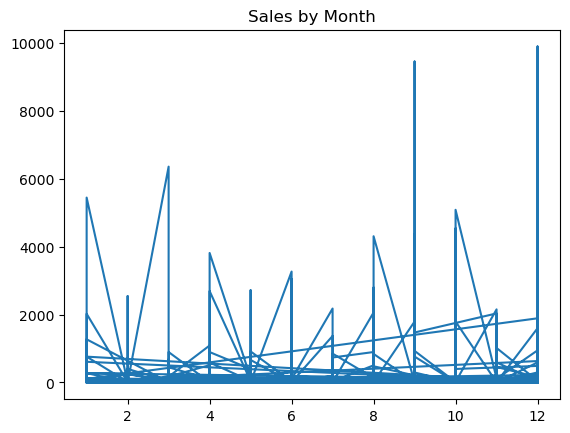

In [58]:
b_df = sales_df.loc[sales_df["Sub-Category"] == "Binders"]

x = b_df["Month"]
y = b_df["Sales"]

plt.plot(x, y)
plt.title("Sales by Month")
plt.show()